# Cluster
set of datas, to find a centre point in the data we use KMEANS, 
formula used is of centroid in order to find centre of data
ex:

    187    75    187,75
    172    80    172,75
    190    75    190,75
    180    65    180,65
    
    1.sqrt( ( 190 - 187 )^2 + ( 190 - 172 )^2 ) #Euclidian Distance  #this is smaller it will be selected for further cal.
    2.sqrt( ( 180 - 187 )^2 + ( 180 - 172 )^2 ) #Euclidian Distance
    
    
    selecting 1
    
    190+187/2 

In [2]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
img = Image.open(r"C:\Users\vaibhav\Desktop\PY_ML_2019\Facial Recog\sample.jpg")
#print(img)
img_np = np.asarray(img)
print(img_np)
img_np.shape

[[[ 54  66  42]
  [ 43  55  33]
  [ 44  53  34]
  ...
  [123 158 136]
  [ 72  95  85]
  [ 37  56  52]]

 [[ 57  69  45]
  [ 55  67  45]
  [ 59  68  51]
  ...
  [ 69  98  78]
  [ 40  60  49]
  [ 64  79  74]]

 [[ 49  61  37]
  [ 47  59  37]
  [ 51  60  43]
  ...
  [ 42  63  48]
  [ 45  58  49]
  [ 44  55  51]]

 ...

 [[121 148  53]
  [115 142  47]
  [121 148  53]
  ...
  [ 69  86  42]
  [ 65  82  38]
  [ 67  84  42]]

 [[115 145  49]
  [125 155  59]
  [125 152  57]
  ...
  [ 78  95  51]
  [ 84 101  57]
  [ 69  86  42]]

 [[124 154  58]
  [112 142  46]
  [124 151  56]
  ...
  [ 70  87  42]
  [ 83 100  55]
  [ 83 100  55]]]


(4000, 6000, 3)

In [4]:
pixels = img_np.reshape(img_np.shape[0]* img_np.shape[1],
                       img_np.shape[2])
pixels.shape

(24000000, 3)

# The Larger the no. of Cluster the slower the program is going to run  

This is Litreally going to take 20 minutes

In [15]:
model = KMeans(n_clusters = 5 )
model.fit(pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
pixels_centroids = model.labels_
cluster_centers = model.cluster_centers_
pixels_centroids

array([3, 3, 3, ..., 1, 1, 1])

In [18]:
cluster_centers

array([[223.62312378, 214.98497241, 185.20575603],
       [ 94.4709439 , 101.79590232,  64.81084792],
       [152.62856953, 162.47607024, 112.30584246],
       [ 44.87972088,  46.98707627,  38.38608132],
       [ 52.52363459, 139.79656482, 115.24460469]])

In [19]:
final = np.zeros((pixels_centroids.shape[0],3))

In [20]:
final.shape

(24000000, 3)

In [21]:
for cluster_no in range(5):
    final[pixels_centroids == cluster_no] = cluster_centers[cluster_no]
    

In [22]:
comp_image = final.reshape(img_np.shape[0],
                          img_np.shape[1],3)
comp_image.shape

(4000, 6000, 3)

In [23]:
comp_image = Image.fromarray(np.uint8(comp_image))
comp_image.save('sample1.jpg')

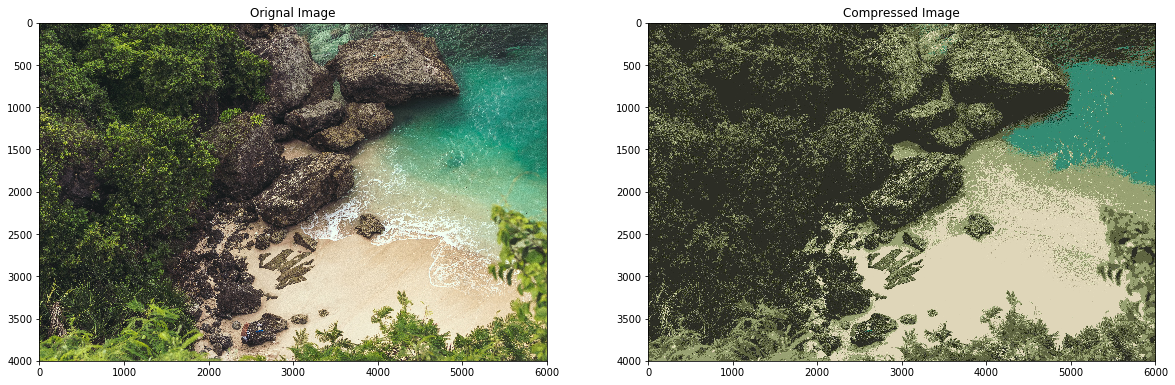

In [24]:
fname = r'C:\Users\vaibhav\Desktop\PY_ML_2019\Facial Recog\sample.jpg'
fname1 = 'sample1.jpg'
img1 = mpimg.imread(fname,0)
img2 = mpimg.imread(fname1,0)
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,20))
ax1.imshow(img1)
ax1.set_title('Orignal Image')
ax2.imshow(img2)
ax2.set_title('Compressed Image')
plt.show()

In [25]:
import os
print('Size of Orignal Image', int(os.stat(r'C:\Users\vaibhav\Desktop\PY_ML_2019\Facial Recog\sample.jpg').st_size/1024),'kB')
print('Size of Compressed Image',int(os.stat('sample1.jpg').st_size/1024),'kB')

Size of Orignal Image 7750 kB
Size of Compressed Image 5144 kB
